# Project 2
## Oscar Kardon
## Top 3 Model between the two class sections
## 4/7/2024


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

file_link = 'https://drive.google.com/uc?export=download&id=1OQIDkVeh-hQePVP1JGA6RmwLyRuk0QjQ'
df = pd.read_csv(file_link)
df.head()

,ID,Name,Pronoun,Birthday,Weight,ZipCode,SqFt,Pets,Water,Shoes,Commute,NumKids,Exercise,Beverage
0,100001,Ernest Sayer - software engineer,he,1971-09-09,176.35,6861,2181,fish,81.3,7,40.81,2.0,High,Cider
1,100002,Joseph Polston - teacher,they,1998-06-25,194.64,8161,2272,"cat,cat",?,5,23.48,2.0,High,Tea
2,100003,Phillip Rivers - scientist,he,1956-05-20,195.02,221,2029,"fish,dog",21.92,14,44.74,1.0,NaN,Cider
3,100004,Clara Harrill - physician,she,2004-08-22,153.16,221,2592,"dog,dog",153.92,2,24.76,NaN,NaN,Coffee
4,100005,Mary Wilson - physician,she,1936-05-09,151.59,7770,1069,NaN,?,10,43.95,2.0,Low,Coffee


Examine the characteristics of the attributes, including relevant statistics for each attribute.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1500 non-null   int64  
 1   Name      1497 non-null   object 
 2   Pronoun   1500 non-null   object 
 3   Birthday  1500 non-null   object 
 4   Weight    1500 non-null   float64
 5   ZipCode   1500 non-null   int64  
 6   SqFt      1500 non-null   int64  
 7   Pets      1138 non-null   object 
 8   Water     1500 non-null   object 
 9   Shoes     1500 non-null   int64  
 10  Commute   1494 non-null   float64
 11  NumKids   1362 non-null   float64
 12  Exercise  978 non-null    object 
 13  Beverage  1500 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 164.2+ KB


In [ ]:
df.describe()

,ID,Weight,ZipCode,SqFt,Shoes,Commute,NumKids
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1494.000000,1362.000000
mean,100750.500000,181.653713,3798.285333,2027.300000,7.150667,26.116640,2.476505
std,433.157015,44.248954,3123.393927,612.348734,3.806699,18.211581,1.173973
min,100001.000000,130.140000,221.000000,-1000.000000,0.000000,0.140000,1.000000
25%,100375.750000,155.447500,221.000000,1718.500000,4.000000,11.795000,2.000000
50%,100750.500000,173.135000,3977.000000,2013.500000,7.000000,23.425000,2.000000
75%,101125.250000,193.707500,6861.000000,2266.000000,10.000000,37.310000,3.000000
max,101500.000000,379.940000,8161.000000,6494.000000,22.000000,110.720000,6.000000


In [ ]:
df.nunique()

ID          1500
Name        1497
Pronoun        3
Birthday    1458
Weight      1382
ZipCode       10
SqFt         970
Pets         579
Water       1412
Shoes         22
Commute     1310
NumKids        6
Exercise       3
Beverage       4
dtype: int64

Wrangle the data to get it clean and ready for machine learning.


check duplicates

In [ ]:
print('There are', df.shape[0], 'rows before')
df = df.drop_duplicates()
print('There are', df.shape[0], 'rows after')

There are 1500 rows before
There are 1500 rows after


Drop ID

In [ ]:
df = df.drop(['ID'], axis=1)

Fix Name to make name and job

In [ ]:
df[['Name', 'Job']] = df['Name'].str.split(' - ', expand=True)

Drop name

In [ ]:
df = df.drop(['Name'], axis=1)

Change Birthday to Age

In [ ]:
df['Birthday'] = pd.to_datetime(df['Birthday'])
import datetime
today = datetime.date.today()
df['Age'] = today.year - df['Birthday'].dt.year - ((today.month - df['Birthday'].dt.month) < 0) - ((today.day - df['Birthday'].dt.day) < 0)
df = df.drop(['Birthday'], axis=1)

Column for contains of each pet. I tried using a count for all and it did not work much better so I left it as I originally had.

In [ ]:
df['Pets'] = df['Pets'].astype(str)
df['Dog'] = df['Pets'].str.contains("dog")
df['Cat'] = df['Pets'].str.contains("cat")
df['Fish'] = df['Pets'].str.contains("fish")
df['Hamster'] = df['Pets'].str.contains("hamster")
df['Lizard'] = df['Pets'].str.contains("lizard")
df['pet_counts'] = df['Pets'].str.count(',')
df['pet_counts'] = pd.to_numeric(df['pet_counts'])
df['pet_counts'] = df['pet_counts'] + 1
df = df.drop('Pets', axis=1)


Fills in null and missing values

In [ ]:
df['Exercise'] = df['Exercise'].fillna('None')
df['Water'] = df['Water'].replace(['?'], np.nan)

Fills in more null values

In [ ]:
df['NumKids'] = df['NumKids'].fillna(0)
df['Commute'] = df['Commute'].fillna(0)
df['Job'] = df['Job'].fillna('Unemployed')

Converts water to numeric value

In [ ]:
df['Water'] = pd.to_numeric(df['Water'])

Gets the water consumption average for each pronoun and insert it into null values

In [ ]:
for pronoun in ['he', 'she', 'they']:
  mask = df['Pronoun'] == pronoun
  avg_water = df.loc[mask, 'Water'].mean()
  df.loc[mask, 'Water']= df.loc[mask, 'Water'].fillna(avg_water)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pronoun     1500 non-null   object 
 1   Weight      1500 non-null   float64
 2   ZipCode     1500 non-null   int64  
 3   SqFt        1500 non-null   int64  
 4   Water       1500 non-null   float64
 5   Shoes       1500 non-null   int64  
 6   Commute     1500 non-null   float64
 7   NumKids     1500 non-null   float64
 8   Exercise    1500 non-null   object 
 9   Beverage    1500 non-null   object 
 10  Job         1500 non-null   object 
 11  Age         1500 non-null   int32  
 12  Dog         1500 non-null   bool   
 13  Cat         1500 non-null   bool   
 14  Fish        1500 non-null   bool   
 15  Hamster     1500 non-null   bool   
 16  Lizard      1500 non-null   bool   
 17  pet_counts  1500 non-null   int64  
dtypes: bool(5), float64(4), int32(1), int64(4), object(4)
memory usage: 

Visualizations

<Axes: xlabel='Beverage', ylabel='count'>

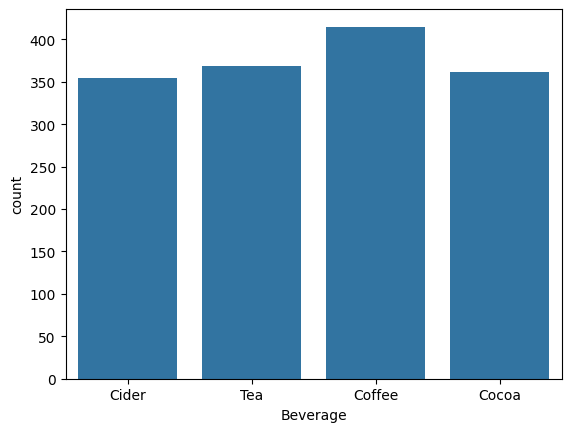

In [ ]:
sns.countplot(df, x='Beverage')

<Axes: xlabel='Weight', ylabel='Beverage'>

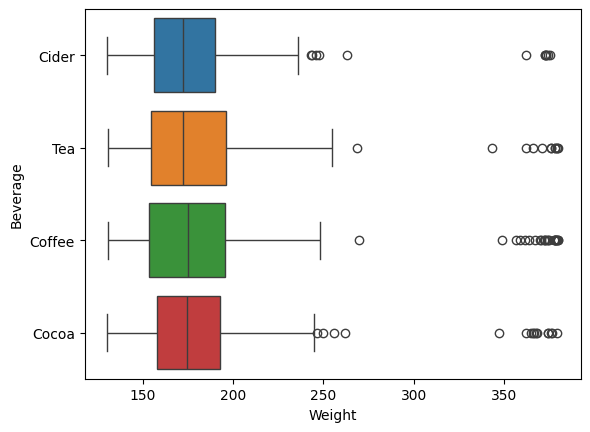

In [ ]:
sns.boxplot(df, y='Beverage', x='Weight', hue='Beverage')

<Axes: xlabel='Age', ylabel='Water'>

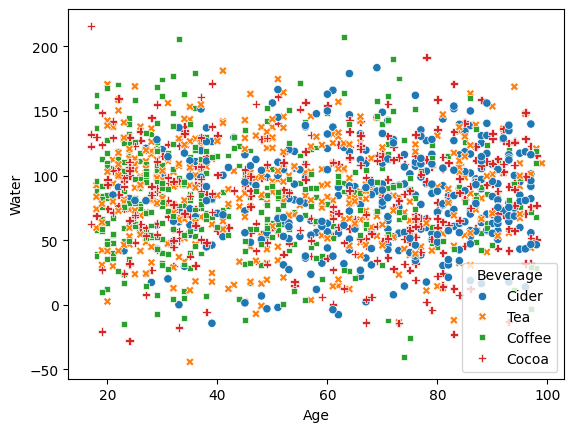

In [ ]:
sns.scatterplot(df, x='Age', y='Water', hue='Beverage', style='Beverage')

<Axes: xlabel='Commute', ylabel='Weight'>

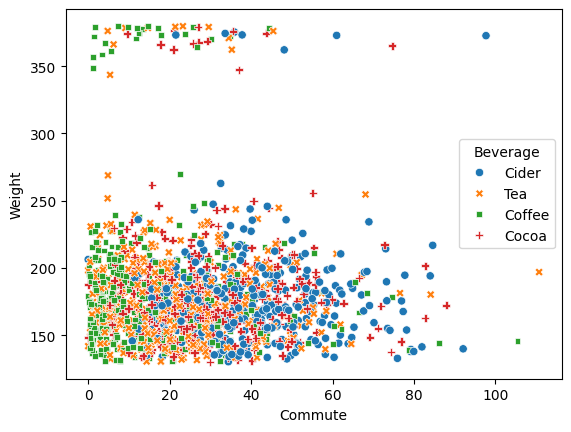

In [ ]:
sns.scatterplot(df, x='Commute', y='Weight', hue='Beverage', style='Beverage')

I first visualized the beverage distrubition because I think it could be significant later on. The distrubuition was fairly equal.  I then visualized the beverage choice by weight to see if there was a significant difference between beverage choices. It looked like there was less outliers for tea users but the medians were all closely aligned. I also used scatterplots to show beverage choice by Birthday and water consumption and by weight and commute. Birthday and water was all over the place but it looked like commute went from coffee to tea and cocoa to cider users for commute length in general.

To clean the data I dropped unhelpful columns like ID and Name. I gave columns the correct data type and filled null values. I also created a job column and multiple columns for pets.

Make exercise an ordinal map

In [ ]:
ord_map = {
    'High': 1,
    'Medium': 2,
    'Low': 3,
    'None': 4,
}

df['Exercise'] = df['Exercise'].map(ord_map)

Convert pronoun to numeric order

In [ ]:
ord_map = {
    'he': 1,
    'they': 2,
    'she': 3,
}

df['Pronoun'] = df['Pronoun'].map(ord_map)

Gives each job a number value

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Job'] = label_encoder.fit_transform(df['Job'])

Replace the pet columns with numbers

In [ ]:
df['Dog'] = df['Dog'].replace([True], 1)
df['Dog'] = df['Dog'].replace([False], 0)
df['Cat'] = df['Cat'].replace([True], 1)
df['Cat'] = df['Cat'].replace([False], 0)
df['Fish'] = df['Fish'].replace([True], 1)
df['Fish'] = df['Fish'].replace([False], 0)
df['Hamster'] = df['Hamster'].replace([True], 1)
df['Hamster'] = df['Hamster'].replace([False], 0)
df['Lizard'] = df['Lizard'].replace([True], 1)
df['Lizard'] = df['Lizard'].replace([False], 0)


In [ ]:
df

,Pronoun,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Beverage,Job,Age,Dog,Cat,Fish,Hamster,Lizard,pet_counts
0,1,176.35,6861,2181,81.300000,7,40.81,2.0,1,Cider,9,52,0,0,1,0,0,1
1,2,194.64,8161,2272,82.135302,5,23.48,2.0,1,Tea,10,24,0,1,0,0,0,2
2,1,195.02,221,2029,21.920000,14,44.74,1.0,4,Cider,7,66,1,0,1,0,0,2
3,3,153.16,221,2592,153.920000,2,24.76,0.0,4,Coffee,4,18,1,0,0,0,0,2
4,3,151.59,7770,1069,84.859533,10,43.95,2.0,3,Coffee,4,87,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2,135.31,221,1808,36.990000,9,5.37,1.0,1,Tea,1,33,1,0,0,0,0,1
1496,3,194.04,221,2027,162.050000,5,3.43,3.0,4,Coffee,4,18,0,0,0,0,0,1
1497,1,155.53,6861,2174,150.020000,6,44.01,4.0,3,Cider,10,60,0,0,0,1,0,1
1498,3,187.42,221,1546,126.710000,5,12.13,2.0,4,Tea,6,40,1,0,0,0,0,2


Ready for machine learning

In [ ]:
X = df.drop(['Beverage'], axis=1)
y = df['Beverage']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=10)

#1 RandomForestClassifier

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# trees = np.arange(1, 400, 20)

# train_scores, valid_scores = validation_curve(
#     RandomForestClassifier(), Xtrain, ytrain,
#     param_name="n_estimators", param_range=trees, cv=3)

# fig, ax = plt.subplots()
# ax.plot(trees, train_scores.mean(axis=1), '.-k', label='Training')
# ax.plot(trees, valid_scores.mean(axis=1), '.:b', label='Validation')
# ax.set_xlabel('n_estimators')
# ax.set_ylabel('Accuracy')
# ax.set_title('Random Forest Accuracy vs n_estimators')
# ax.legend()

150 to 175 looks liked the best

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# trees = np.arange(150, 175)

# train_scores, valid_scores = validation_curve(
#     RandomForestClassifier(), Xtrain, ytrain,
#     param_name="n_estimators", param_range=trees, cv=3)

# fig, ax = plt.subplots()
# ax.plot(trees, train_scores.mean(axis=1), '.-k', label='Training')
# ax.plot(trees, valid_scores.mean(axis=1), '.:b', label='Validation')
# ax.set_xlabel('n_estimators')
# ax.set_ylabel('Accuracy')
# ax.set_title('Random Forest Accuracy vs n_estimators')
# ax.legend()

155 to 160 has the best

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# trees = np.arange(155, 160)

# train_scores, valid_scores = validation_curve(
#     RandomForestClassifier(), Xtrain, ytrain,
#     param_name="n_estimators", param_range=trees, cv=3)

# fig, ax = plt.subplots()
# ax.plot(trees, train_scores.mean(axis=1), '.-k', label='Training')
# ax.plot(trees, valid_scores.mean(axis=1), '.:b', label='Validation')
# ax.set_xlabel('n_estimators')
# ax.set_ylabel('Accuracy')
# ax.set_title('Random Forest Accuracy vs n_estimators')
# ax.legend()

156 has the best

In [ ]:
model = RandomForestClassifier(n_estimators=156, random_state=5)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

accuracy = accuracy_score(ytest, ypred)
print(accuracy)

0.744


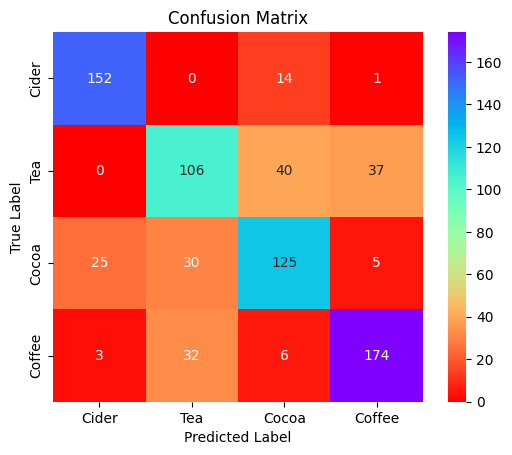

In [ ]:
from sklearn.metrics import confusion_matrix

labels = ytrain.unique()
cm = confusion_matrix(ytest, ypred, labels=labels)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                    cmap="rainbow_r",
                    xticklabels=labels,
                    yticklabels=labels)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 2 XGB Classifier with GridSearch

In [ ]:
ord_map = {
    'Cider': 0,
    'Cocoa': 1,
    'Coffee': 2,
    'Tea': 3,
}
y = y.map(ord_map)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=10)

In [ ]:
X.head()

,Pronoun,Weight,ZipCode,SqFt,Water,Shoes,Commute,NumKids,Exercise,Job,Age,Dog,Cat,Fish,Hamster,Lizard,pet_counts
0,1,176.35,6861,2181,81.300000,7,40.81,2.0,1,9,52,0,0,1,0,0,1
1,2,194.64,8161,2272,82.135302,5,23.48,2.0,1,10,24,0,1,0,0,0,2
2,1,195.02,221,2029,21.920000,14,44.74,1.0,4,7,66,1,0,1,0,0,2
3,3,153.16,221,2592,153.920000,2,24.76,0.0,4,4,18,1,0,0,0,0,2
4,3,151.59,7770,1069,84.859533,10,43.95,2.0,3,4,87,0,0,0,0,0,1


Grid search for best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


# param_grid = {'n_estimators': np.arange(1, 300, 30),
#               'max_depth': np.arange(1, 50, 10),
#               'learning_rate': np.arange(0.1, 1.2, .2)}


# grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, verbose=1)

# grid.fit(Xtrain, ytrain)
# took 6 minutes to run

In [ ]:
# grid.best_params_

In [ ]:
model = XGBClassifier(n_estimators=121, max_depth=4, learning_rate=0.5000000000000001)
model.fit(Xtrain, ytrain)

# make predictions for test data
ypred = model.predict(Xtest)

# evaluate predictions
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 77.20%


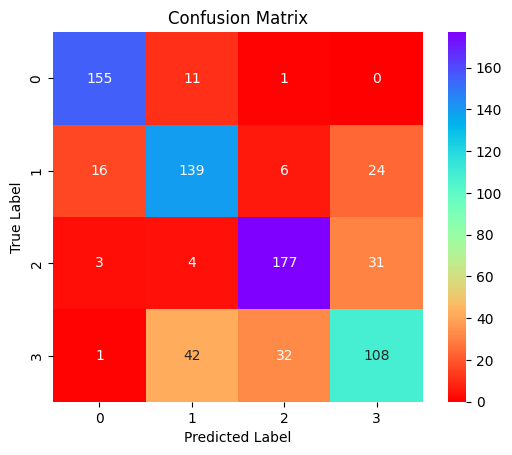

In [ ]:
labels = labels = np.unique(ytrain)

cm = confusion_matrix(ytest, ypred, labels=labels)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                    cmap="rainbow_r",
                    xticklabels=labels,
                    yticklabels=labels)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

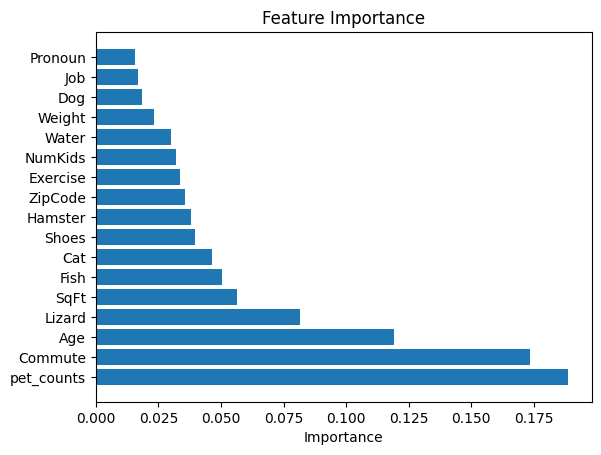

In [ ]:
feat_imp = pd.DataFrame({'Feature': X.columns,
                      'Importance': model.feature_importances_})

feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots()

# horizontal bar charts can make text easier to read
ax.barh(feat_imp['Feature'], feat_imp['Importance'])
ax.set_xlabel('Importance')
ax.set_title('Feature Importance');

Perform another grid search with lower max depth

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


# param_grid = {'n_estimators': np.arange(1, 300, 30),
#               'max_depth': np.arange(1, 10, 2),
#               'learning_rate': np.arange(0.1, 1.2, .2)}


# grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, verbose=1)

# grid.fit(Xtrain, ytrain)

In [ ]:
# grid.best_params_

Chnaged them up a bit manually and got better

In [ ]:
model = XGBClassifier(n_estimators=31, max_depth=5, learning_rate=0.7000000000000001)
model.fit(Xtrain, ytrain)

# make predictions for test data
ypred = model.predict(Xtest)

# evaluate predictions
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 76.67%


Another grid search with different parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


# param_grid = {'n_estimators': np.arange(1, 50, 2),
#               'max_depth': np.arange(1, 15, 2),
#               'learning_rate': np.arange(0.1, 1.2, 0.1)}


# grid = GridSearchCV(XGBClassifier(), param_grid, cv=3, verbose=1)

# grid.fit(Xtrain, ytrain)

In [ ]:
# grid.best_params_

In [ ]:
# grid.best_score_

In [ ]:
model = XGBClassifier(n_estimators=39, max_depth=5, learning_rate=0.8)
model.fit(Xtrain, ytrain)

# make predictions for test data
ypred = model.predict(Xtest)

# evaluate predictions
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 78.00%


I spent most of my time trying to maximize my XGB classifier with not much real success. It was frustrating running my grid search and then being able to manually tweak it to make it better since I was only searching through a limited amount of combinations due to compute time. I tried different tactics such as getting the number of a pet rather than if there is one or not, changing the columns included, and experimenting with cross features but it was never clear if it was working well or not. My Random classifier was solid but I think lacked the potential of my XGB classifier.